In [57]:
%load_ext autoreload

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils import *

### Read the borrower's request data

In [48]:
df_borrowers = load_borrowers();
df_borrowers.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  
0             1073            0              0   47                 3  
1             5299            1          13500   33                 1  
2             3422            1          24500   38                 8  
3             3388            0              0   24                 1  
4             4282            1          18100   36                 1

In [49]:
df_borrowers.describe()

loan_id  is_first_loan  fully_repaid_previous_loans  \
count  101100.000000  101100.000000                 46153.000000   
mean   499666.826726       0.543492                     0.899291   
std    288662.006929       0.498107                     0.300946   
min        30.000000       0.000000                     0.000000   
25%    250333.750000       0.000000                     1.000000   
50%    499885.000000       1.000000                     1.000000   
75%    749706.250000       1.000000                     1.000000   
max    999987.000000       1.000000                     1.000000   

       currently_repaying_other_loans  total_credit_card_limit  \
count                    46153.000000            101100.000000   
mean                         0.364332              4112.743818   
std                          0.481247              2129.121462   
min                          0.000000                 0.000000   
25%                          0.000000              2700.000000   
50%                          0.000000              4100.000000   
75%                          1.000000              5500.000000   
max                          1.000000             13500.000000   

       avg_percentage_credit_card_limit_used_last_year  saving_amount  \
count                                     94128.000000  101100.000000   
mean                                          0.724140    1799.617616   
std                                           0.186483    1400.545141   
min                                           0.000000       0.000000   
25%                                           0.600000     834.000000   
50%                                           0.730000    1339.000000   
75%                                           0.860000    2409.000000   
max                                           1.090000   10641.000000   

       checking_amount    is_employed  yearly_salary            age  \
count    101100.000000  101100.000000  101100.000000  101100.000000   
mean       3177.150821       0.658675   21020.727992      41.491632   
std        2044.448155       0.474157   18937.581415      12.825570   
min           0.000000       0.000000       0.000000      18.000000   
25%        1706.000000       0.000000       0.000000      32.000000   
50%        2673.000000       1.000000   21500.000000      41.000000   
75%        4241.000000       1.000000   35300.000000      50.000000   
max       13906.000000       1.000000   97200.000000      79.000000   

       dependent_number  
count     101100.000000  
mean           3.864748  
std            2.635491  
min            0.000000  
25%            2.000000  
50%            3.000000  
75%            6.000000  
max            8.000000

Text(0, 0.5, 'number of applicants')

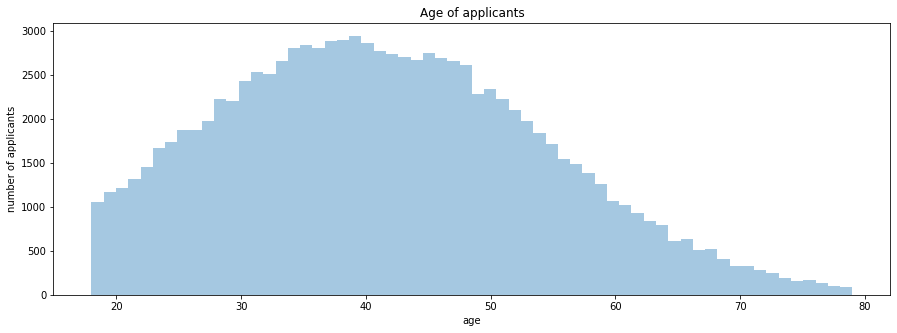

In [50]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

sns.distplot(df_borrowers.age, kde=False, bins=len(df_borrowers.age.unique()), ax=ax)
ax.set_title("Age of applicants")
ax.set_ylabel('number of applicants')

Base on above analyzed, the most applicants are between 30 and 54 years of age.

In [51]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

sns.barplot(
    data=df_borrowers,
    x='is_first_loan',
    y='loan_id',
    estimator=len,
    ax=ax)
ax.set_ylim([0, 100000])
ax.set_title("First loan descriptives")
ax.set_ylabel('number of applicants')

Text(0, 0.5, 'number of applicants')

### Load the fact loans data

In [52]:
df_loans = load_loans()
df_loans.head()

loan_id loan_purpose loan_request_date  loan_granted  loan_repaid
0    19454   investment        2012-03-15             0          NaN
1   496811   investment        2012-01-17             0          NaN
2   929493        other        2012-02-09             0          NaN
3   580653        other        2012-06-27             1          1.0
4   172419     business        2012-05-21             1          0.0

In [53]:
df_loans.describe()

loan_id   loan_granted   loan_repaid
count  101100.000000  101100.000000  47654.000000
mean   499666.826726       0.471355      0.644353
std    288662.006929       0.499181      0.478714
min        30.000000       0.000000      0.000000
25%    250333.750000       0.000000      0.000000
50%    499885.000000       0.000000      1.000000
75%    749706.250000       1.000000      1.000000
max    999987.000000       1.000000      1.000000

### Let see how many borrower's requests have been granted

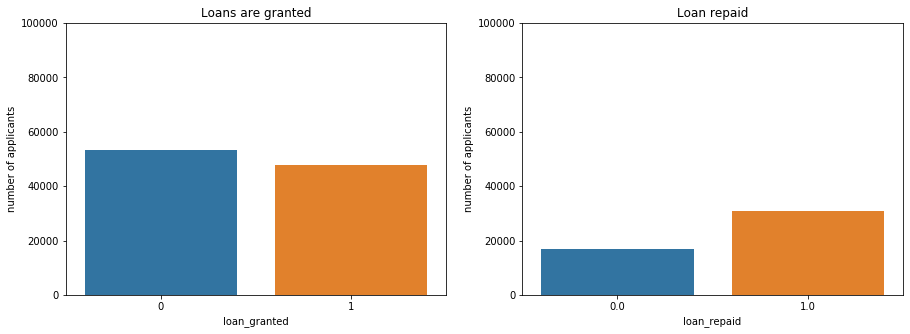

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axs[0]
sns.barplot(
    data=df_loans.loc[df_loans.loan_granted != -1],
    x='loan_granted',
    y='loan_id',
    estimator=len,
    ax=ax)
ax.set_ylim([0, 100000])
ax.set_title('Loans are granted')
ax.set_ylabel('number of applicants')

ax = axs[1]
sns.barplot(
    data=df_loans.loc[df_loans.loan_repaid != -1],
    x='loan_repaid',
    y='loan_id',
    estimator=len,
    ax=ax)
ax.set_ylim([0, 100000])
ax.set_title('Loan repaid')
ax.set_ylabel('number of applicants');

### Correlations between outcome  and features

In [38]:
df_merge = pd.merge(df_loans, df_borrowers, on='loan_id')

In [55]:
df_merge_loan_granted = df_merge.loc[df_merge.loan_granted == 1]
df_merge_loan_granted.head()

loan_id     loan_purpose loan_request_date  loan_granted  loan_repaid  \
3   580653            other        2012-06-27             1          1.0   
4   172419         business        2012-05-21             1          0.0   
6   780070         business        2012-03-14             1          1.0   
7   303138  emergency_funds        2012-08-31             1          0.0   
8    91475       investment        2012-05-25             1          1.0   

   is_first_loan  fully_repaid_previous_loans  currently_repaying_other_loans  \
3              0                          1.0                             0.0   
4              1                          NaN                             NaN   
6              0                          1.0                             0.0   
7              0                          0.0                             1.0   
8              0                          1.0                             0.0   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
3                     5400                                             0.52   
4                     2900                                             0.76   
6                     7800                                             0.30   
7                     4300                                             1.02   
8                     3900                                             0.65   

   saving_amount  checking_amount  is_employed  yearly_salary  age  \
3           3345             2764            1          15800   58   
4           1050             3695            1          34800   31   
6           4206             4368            1          51100   51   
7            886             1597            1          15000   59   
8           1837             3795            1          12000   24   

   dependent_number  
3                 4  
4                 4  
6                 2  
7                 2  
8                 1

In [56]:
df_merge_loan_granted.describe()

loan_id  loan_granted   loan_repaid  is_first_loan  \
count   47654.000000       47654.0  47654.000000   47654.000000   
mean   500187.775402           1.0      0.644353       0.541172   
std    288925.682009           0.0      0.478714       0.498307   
min        37.000000           1.0      0.000000       0.000000   
25%    248669.250000           1.0      0.000000       0.000000   
50%    500013.500000           1.0      1.000000       1.000000   
75%    750413.250000           1.0      1.000000       1.000000   
max    999968.000000           1.0      1.000000       1.000000   

       fully_repaid_previous_loans  currently_repaying_other_loans  \
count                 21865.000000                    21865.000000   
mean                      0.902493                        0.297736   
std                       0.296654                        0.457273   
min                       0.000000                        0.000000   
25%                       1.000000                        0.000000   
50%                       1.000000                        0.000000   
75%                       1.000000                        1.000000   
max                       1.000000                        1.000000   

       total_credit_card_limit  \
count             47654.000000   
mean               4527.848659   
std                1975.127016   
min                   0.000000   
25%                3100.000000   
50%                4400.000000   
75%                5800.000000   
max               13500.000000   

       avg_percentage_credit_card_limit_used_last_year  saving_amount  \
count                                     46751.000000   47654.000000   
mean                                          0.700091    2022.366580   
std                                           0.177729    1493.410303   
min                                           0.000000       0.000000   
25%                                           0.580000     914.000000   
50%                                           0.710000    1553.000000   
75%                                           0.830000    2878.000000   
max                                           1.090000   10641.000000   

       checking_amount   is_employed  yearly_salary           age  \
count     47654.000000  47654.000000   47654.000000  47654.000000   
mean       3499.160595      0.909829   29245.991942     41.524657   
std        2155.128304      0.286429   16286.512395     12.817587   
min           0.000000      0.000000       0.000000     18.000000   
25%        1873.000000      1.000000   18900.000000     32.000000   
50%        3024.500000      1.000000   29400.000000     41.000000   
75%        4842.000000      1.000000   40200.000000     50.000000   
max       13165.000000      1.000000   97200.000000     79.000000   

       dependent_number  
count      47654.000000  
mean           3.752445  
std            2.621351  
min            0.000000  
25%            2.000000  
50%            3.000000  
75%            6.000000  
max            8.000000

Consider the loan purpose, it could be a good feature in the model.

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.barplot(
    data=df_merge_loan_granted,
    x='loan_purpose',
    y='loan_repaid',
    estimator=np.mean,
    ax=ax)
ax.set_ylim([0, 1])
ax.set_title('Correlation between loan repaid and the purpose of the loan')
ax.set_ylabel('loan repaid')
ax.set_xlabel('loan purpose')

Text(0.5, 0, 'loan purpose')